# Test GEModelTools - HANK

This notebook shows how to **solve a simple Heterogenous Agent New Keynessian (HANK) model** using the `GEModelTools` package.

**The steps of the sequence-space solution method are:**

1. Find the stationary equilibrium (steady state for aggregates and distribution).
2. Compute Jacobians of the household block and the full model (to unknowns and shocks)
3. Find the non-linear transition path or the linearized impulse responses to a given shock path.
4. Simulate the linearized model with aggregate risk

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
import sys
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
#np.set_printoptions(threshold=sys.maxsize)

from HANKmodel import HANKModelClass

C:\Users\Signe\AppData\Local\Temp\ipykernel_12816\1518818971.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Setup

In [95]:
#print(model)
model = HANKModelClass(name='baseline')

# Step 1: Steady state

In [96]:
model.find_ss(do_print=True)

Z_N = 0.5000,	 Z_L = 0.5000,	 Q = 1.0000,	 M_N = 0.1192,	 M_L = 0.1192,	 beta = 0.9875,	 N_N = 0.7624,	 N_L = 0.7624
Z_N = 0.5000,	 Z_L = 0.5000,	 Q = 1.0000,	 M_N = 0.1192,	 M_L = 0.1192,	 beta = 0.9875,	 N_N = 0.7624,	 N_L = 0.7624
Z_N = 0.5000,	 Z_L = 0.5000,	 Q = 1.0000,	 M_N = 0.1192,	 M_L = 0.1192,	 beta = 0.9875,	 N_N = 0.7624,	 N_L = 0.7624
Z_N = 0.5000,	 Z_L = 0.5000,	 Q = 1.0000,	 M_N = 0.1192,	 M_L = 0.1192,	 beta = 0.9875,	 N_N = 0.7624,	 N_L = 0.7624
Z_N = 0.5000,	 Z_L = 0.5000,	 Q = 1.0000,	 M_N = 0.1192,	 M_L = 0.1192,	 beta = 0.9875,	 N_N = 0.7624,	 N_L = 0.7624
Z_N = 0.5000,	 Z_L = 0.5000,	 Q = 1.0000,	 M_N = 0.1192,	 M_L = 0.1192,	 beta = 0.9875,	 N_N = 0.7624,	 N_L = 0.7624
Z_N = 0.6619,	 Z_L = 0.6092,	 Q = 1.0866,	 M_N = 0.1189,	 M_L = 0.1192,	 beta = 0.9907,	 N_N = 0.5744,	 N_L = 0.6258
Z_N = 0.6649,	 Z_L = 0.6391,	 Q = 1.0403,	 M_N = 0.1191,	 M_L = 0.1192,	 beta = 0.9893,	 N_N = 0.5730,	 N_L = 0.5965
Z_N = 0.6732,	 Z_L = 0.6652,	 Q = 1.0120,	 M_N = 0.1192,	 M_L = 

In [85]:
model.solve_hh_ss(do_print=True)

household problem in ss solved in 0.4 secs [563 iterations]


In [86]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

In [87]:
ss.w_N/(ss.ELL_hh**(par.nu)*((ss.C**par.sigma)*ss.C_HAT_N_hh/par.alpha_hh)**(1/par.gamma_hh))
#par.varphi
#
# 
# 
# ss.ELL_hh**(-par.nu)*((ss.C**par.sigma)*ss.C_HAT_N_hh/par.alpha_hh)**(-1/par.gamma_hh)*((par.mu_L**(par.gamma_L-1)-par.alpha_L*ss.pm**(1-par.gamma_L))/(1-par.alpha_L))**(1/(1-par.gamma_L))*ss.Q*ss.Z_L


#first_bracket = (((ss.C_hh**(par.sigma)*par.alpha_N*ss.C_HAT_N_hh)**(-1/par.gamma_N)*ss.ELL_hh**(-par.nu))/ss.Z_N)
#second_bracket = ((par.mu_N**(par.gamma_N-1)-par.alpha_N*ss.pm**(1-par.gamma_N))/(1-par.alpha_N))**(1/(1-par.gamma_N))
#print(first_bracket, second_bracket)
#(ss.C_hh**(par.sigma)*par.alpha_N*ss.C_HAT_N_hh)**(-1/par.gamma_N)

#((par.mu_N**(par.gamma_N-1)-par.alpha_N*ss.pm**(1-par.gamma_N))/(1-par.alpha_N))**(1/(1-par.gamma_N))*(((ss.C_hh**(par.sigma)*par.alpha_N*ss.C_HAT_N_hh)**(-1/par.gamma_N)*ss.ELL_hh**(-par.nu))/ss.Z_N)

0.8017264165856933

In [88]:
print(model)

Modelclass: HANKModelClass
Name: baseline

namespaces: ['ini', 'path', 'ss', 'sol', 'par', 'sim']
other_attrs: ['par', 'ini', 'ss', 'path', 'sim', 'grids_hh', 'pols_hh', 'inputs_hh', 'inputs_hh_z', 'outputs_hh', 'intertemps_hh', 'shocks', 'unknowns', 'targets', 'varlist', 'jac', 'H_U', 'H_Z', 'jac_hh', 'IRF']
savefolder: saved
cpp_filename: None

ini:
 Dz = ndarray with shape = (1, 7) [dtype: float64]
 Dbeg = ndarray with shape = (1, 7, 500) [dtype: float64]
 A = nan [float]
 B = nan [float]
 C = nan [float]
 C_N = nan [float]
 C_L = nan [float]
 clearing_A = nan [float]
 clearing_C = nan [float]
 clearing_C_N = nan [float]
 clearing_C_L = nan [float]
 clearing_N = nan [float]
 d = nan [float]
 d_N = nan [float]
 d_L = nan [float]
 G = nan [float]
 i = nan [float]
 N = nan [float]
 N_N = nan [float]
 N_L = nan [float]
 M_N = nan [float]
 M_L = nan [float]
 pm = nan [float]
 NKPC_res_N = nan [float]
 NKPC_res_L = nan [float]
 pi = nan [float]
 pi_N = nan [float]
 pi_L = nan [float]
 adj

In [35]:
print("steady state consumption C_hh", ss.C_hh,"C_Lhh", ss.C_L_hh,"C_Nhh", ss.C_N_hh)
print("steady state consumption C", ss.C,"C_L", ss.C_L,"C_N", ss.C_N)
print("steaty state production Y", ss.Y,"Y_L", ss.Y_L,"Y_N", ss.Y_N)
print(ss.Q*ss.Y_L + ss.Y_N) 
print(ss.C_L*ss.Q + ss.C_N + (ss.M_L+ss.M_N)*ss.pm)

steady state consumption C_hh 0.44683279797964226 C_Lhh 0.11256527745295927 C_Nhh 0.39020407658177936
steady state consumption C 0.44683279878413773 C_L 0.11256527796231752 C_N 0.39020407658185063
steaty state production Y 1.0 Y_L 0.29245922978993755 Y_N 0.7804081531637013
1.450277702131096
1.2181296730669362


In [32]:
print("Steady state W_L, W_N, Q = ", ss.w_L, ss.w_N, ss.Q)
print("Steady state B, G, A, A_HH, tau = ", ss.B, ss.G, ss.A, ss.A_hh, ss.tau)
#print("Steady state interest rate", ss.r)
print("steady state consumption C_hh", ss.C_hh,"C_Lhh", ss.C_L_hh,"C_Nhh", ss.C_N_hh)
print("Steady state laborsupply ell ", ss.c)
print("varphi= ", par.varphi, "beta = ", par.beta)
print(ss.N_N, ss.Y_N, ss.N_L, ss.Y_L)

Steady state W_L, W_N, Q =  0.7482416366039624 0.435619148751305 0.5821904682135115
Steady state B, G, A, A_HH, tau =  5.6 0.0 5.6 5.599999999999973 0.0
steady state consumption C_hh 0.8584552641063767 C_Lhh 0.4958849288168201 C_Nhh 0.37836717687687127
Steady state laborsupply ell  [[[0.2897711  0.29160509 0.29347048 ... 1.72504347 1.73560344 1.74625443]
  [0.4025848  0.40445004 0.40634452 ... 1.76629464 1.77668494 1.78716698]
  [0.56060303 0.56250274 0.56397763 ... 1.8156099  1.82580072 1.83608406]
  ...
  [0.9322587  0.93233074 0.93240364 ... 1.94923957 1.95892019 1.96869493]
  [1.11715508 1.11720152 1.11724848 ... 2.04144785 2.05080971 2.0602662 ]
  [1.31479974 1.31483455 1.31486979 ... 2.15826706 2.16726673 2.17636014]]]
varphi=  0.8 beta =  0.988250616670671
0.33619476410339716 0.45910861029361894 0.5007778668177006 0.929062599334786


In [33]:
#ss.c
print(ss.c_L[0,1,:])
#ss.c_L.shape
#ss.C_L_hh
#ss.C_hh

[0.23255229 0.23362974 0.23472408 0.2358356  0.23695301 0.23752743
 0.23810879 0.2386971  0.23929241 0.23989458 0.24050353 0.24111908
 0.24162964 0.2420634  0.24249446 0.24293058 0.24337198 0.24381868
 0.24427042 0.24472732 0.24518946 0.2456491  0.2460651  0.24644352
 0.24681717 0.24719159 0.24756869 0.24795025 0.24833633 0.24872673
 0.24912167 0.24952123 0.24992286 0.25031481 0.25068458 0.25103669
 0.25138691 0.25173846 0.25209177 0.25244794 0.25280821 0.25317258
 0.25354114 0.25391399 0.25429017 0.25466499 0.25503066 0.25538319
 0.25572796 0.25607293 0.25641958 0.25676831 0.25711957 0.25747407
 0.2578324  0.25819486 0.25856145 0.25893121 0.25930047 0.25966343
 0.26001715 0.26036582 0.26071545 0.26106715 0.26142107 0.2617776
 0.26213702 0.26249968 0.26286629 0.263237   0.26361088 0.26398472
 0.26435386 0.26471634 0.26507587 0.26543702 0.2658006  0.2661667
 0.26653556 0.26690738 0.2672823  0.26766085 0.26804323 0.26842816
 0.26881236 0.26919245 0.26956858 0.26994439 0.27032254 0.270703

## Policy functions

In [34]:
#fig = plt.figure(figsize=(18,4),dpi=100)
#a_max = 500
#
## a. consumption
#I = par.a_grid < a_max
#
#ax = fig.add_subplot(1,3,1)
#ax.set_title(f'consumption')
#
#for i_z in [0,par.Nz//2,par.Nz-1]:
#    ax.plot(par.a_grid[I],ss.c[0,i_z,I],label=f'i_z = {i_z}')
#
#ax.legend(frameon=True)
#ax.set_xlabel('savings, $a_{t-1}$')
#ax.set_ylabel('consumption, $c_t$')
#
## b. saving
#I = par.a_grid < a_max
#
#ax = fig.add_subplot(1,3,2)
#ax.set_title(f'saving')
#
#for i_z in [0,par.Nz//2,par.Nz-1]:
#    ax.plot(par.a_grid[I],ss.a[0,i_z,I],label=f'i_z = {i_z}')
#
#ax.set_xlabel('savings, $a_{t-1}$')
#ax.set_ylabel('savings, $a_{t}$')
#
## c. labor supply
#I = par.a_grid < a_max
#
#ax = fig.add_subplot(1,3,3)
#ax.set_title(f'labor_supply')
#
#for i_z in [0,par.Nz//2,par.Nz-1]:
#    ax.plot(par.a_grid[I],ss.ell[0,i_z,I],label=f'i_z = {i_z}')
#
#ax.set_xlabel('savings, $a_{t-1}$')
#ax.set_ylabel('labor supply, $n_{t}$')
#
#fig.tight_layout()

## Simulation

In [35]:
#fig = plt.figure(figsize=(12,4),dpi=100)
#
## a. income
#ax = fig.add_subplot(1,2,1)
#ax.set_title('productivity')
#
#y = np.cumsum(np.sum(ss.D[0],axis=1))
#ax.plot(par.z_grid,y/y[-1])
#
#ax.set_xlabel('productivity, $z_{t}$')
#ax.set_ylabel('CDF')
#
## b. assets
#ax = fig.add_subplot(1,2,2)
#ax.set_title('savings')
#y = np.insert(np.cumsum(np.sum(ss.D[0],axis=0)),0,0.0)
#ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
#        
#ax.set_xlabel('assets, $a_{t}$')
#ax.set_ylabel('CDF')
#ax.set_xscale('symlog')


# Step 2: Compute Jacobians (incl. tests)

**Household transition path:**

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 4.2 secs
household problem simulated along transition in 6.7 secs



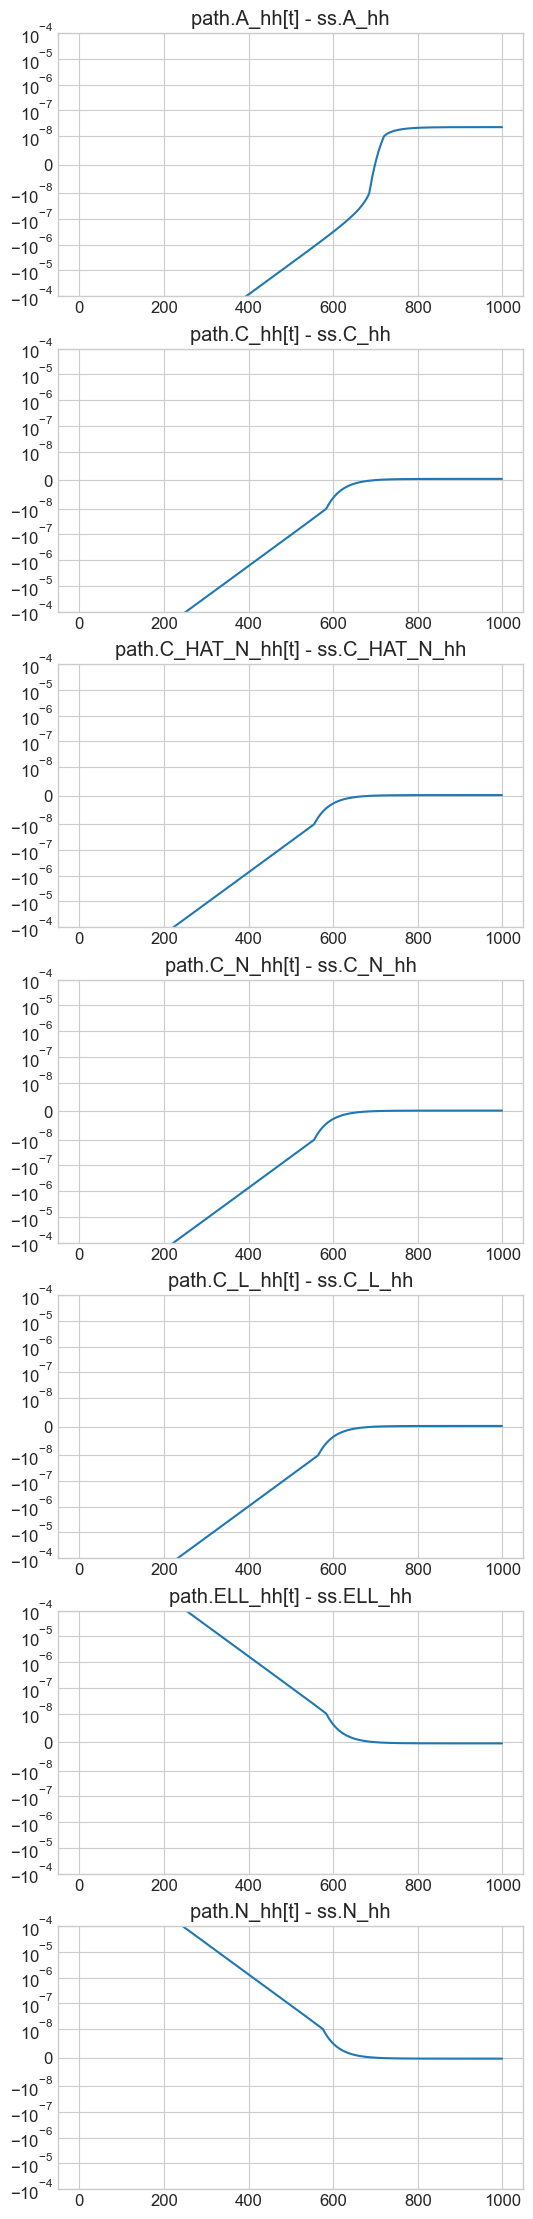

In [36]:
model.test_hh_path()

**Full transition path:**

In [14]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors



ZeroDivisionError: division by zero

In [ ]:
model.test_jacs(s_list=[50,100,150])

# Step 3a: Find non-linear transition path

## Find transition path

In [ ]:
par.jump_pm = 0.10/4
model.find_transition_path(do_print=True)

## Plot transitions

In [ ]:
paths = ['i','pi_L','pi_N','r','C_N']
lvl_value = ['i','pi_L','pi_N','r']
model.show_IRFs(paths,lvl_value=lvl_value,T_max=20,ncols=3)

# Step 3b: Find linearized IRFs

In [ ]:
model.find_IRFs(do_print=True)

In [ ]:
paths = ['C']
model.show_IRFs(paths,T_max=20,ncols=3,do_linear=True)

# Step 4. Simulation

In [ ]:
np.random.seed(1917)
model.simulate(do_print=True)

In [ ]:
def model_sim():
    
    fig = plt.figure(figsize=(12,8),dpi=100)

    ax = fig.add_subplot(2,2,1)
    ax.set_title('i')
    ax.plot(ss.i+sim.di,ls='--')
    ax.axhline(ss.i,color='black',zorder=0)

    ax = fig.add_subplot(2,2,2)
    ax.set_title('pi')
    ax.plot(ss.pi+sim.dpi,ls='--',)
    ax.axhline(ss.pi,color='black',zorder=0)
    
    ax = fig.add_subplot(2,2,3)
    ax.set_title('r')
    ax.plot(ss.r+sim.dr,ls='--',)
    ax.axhline(ss.r,color='black',zorder=0)
    
    ax = fig.add_subplot(2,2,4)
    ax.set_title('C')
    ax.plot(ss.C+sim.dC,ls='--',)
    ax.axhline(ss.C,color='black',zorder=0)
    

In [ ]:
model_sim()